In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

Let's start by loading a csv of data scraped from basketball-reference.com

Here is a link to the csv:

https://drive.google.com/file/d/1fbDESOItyE-dfGNTJEkwPK8iLZVM2dwD/view?usp=sharing

In [27]:
path = '/Users/jovbrza/Downloads/NBA_Player_Stats.csv'
df = pd.read_csv(path)
df = df.drop(columns=['Rk', 'Pos', 'Age', 'Tm', 'Year'])

In [28]:
# counts the appearances of each player
dic = dict(df['Player'].value_counts())

# Multiplies per game avgs by games
def game(col):
    return(col * df['G'])

df[['MPT', 'FGT', 'FGAT', 'FG%T', '3PT', '3PAT', '3P%T', '2PT',\
    '2PAT', '2P%T', 'eFG%T', 'FTT', 'FTAT', 'FT%T', 'ORBT',\
        'DRBT', 'TRBT', 'ASTT', 'STLT', 'BLKT', 'TOVT', 'PFT', 'PTST']] = \
    df[['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',\
        '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',\
            'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(game)

        
# Summing all rows for each player, then dividing by games played gives career per game totals

career = (df.copy().groupby('Player').sum())

# saving totals for later
career['FTA'] = career['FTAT']
career['3PA'] = career['3PAT']
career['2PA'] = career['2PAT']
career['REB'] = career['TRBT']

In [29]:
# Per game avgs

def game(col):
    return(col / career['G'])

career[['MPT', 'FGT', 'FGAT', 'FG%T', '3PT', '3PAT', '3P%T', '2PT',\
    '2PAT', '2P%T', 'eFG%T', 'FTT', 'FTAT', 'FT%T', 'ORBT',\
        'DRBT', 'TRBT', 'ASTT', 'STLT', 'BLKT', 'TOVT', 'PFT', 'PTST']] = \
career[['MPT', 'FGT', 'FGAT', 'FG%T', '3PT', '3PAT', '3P%T', '2PT',\
    '2PAT', '2P%T', 'eFG%T', 'FTT', 'FTAT', 'FT%T', 'ORBT',\
        'DRBT', 'TRBT', 'ASTT', 'STLT', 'BLKT', 'TOVT', 'PFT', 'PTST']].apply(game)

In [30]:
# Unsightly renaming/ tidying of the df

career = career[['G', 'GS', 'MP', 'MPT', 'FGT', 'FGAT', 'FG%T', '3PT', '3PAT', '3P%T', '2PT',\
    '2PAT', '2P%T', 'eFG%T', 'FTT', 'FTAT', 'FT%T', 'ORBT', 'FTA', '3PA', '2PA', 'REB', \
        'DRBT', 'TRBT', 'ASTT', 'STLT', 'BLKT', 'TOVT', 'PFT', 'PTST']]
    
career.rename(columns = {'G':'g', 'GS':'gs', 'MP':'mp', 'MPT':'mpt',\
                         'FGT':'fgm', 'FGAT':'fga', 'FG%T':'fgp', \
                         '3PT':'3pm', '3PAT':'3pa', '3P%T':'3pp', \
                         '2PT':'2pm', '2PAT':'2pa', '2P%T':'2pp',\
                         'eFG%T':'efg', 'FTT':'fgm', 'FTAT':'fta',\
                         'FT%T':'ftp', 'ORBT':'orb','DRBT':'drb', \
                         'TRBT':'rpg', 'ASTT':'apg', 'STLT':'spg', \
                         'BLKT':'bpg', 'TOVT':'tov', 'PFT':'pf', 'PTST':'ppg'}, inplace = True)

Now we have a df (career) of career per game averages for all nba players from 1981 onwards,
Comprising nearly the entire 3 point era.
Lets plot some data.

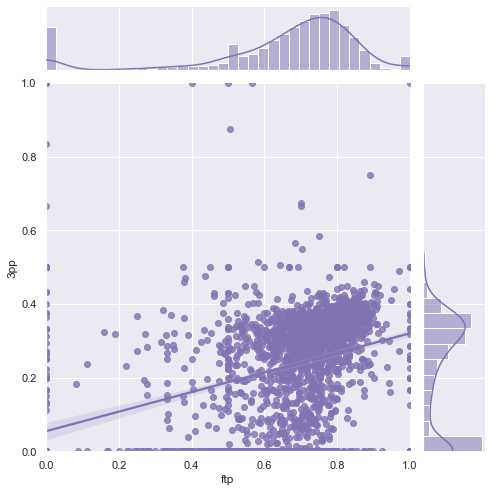

In [31]:
sns.set_theme(style="darkgrid")

sns.jointplot(x=career['ftp'], y=career['3pp'], 
                  kind="reg", truncate=False,
                  xlim=(0, 1), ylim=(0, 1),
                  color="m", height=7)


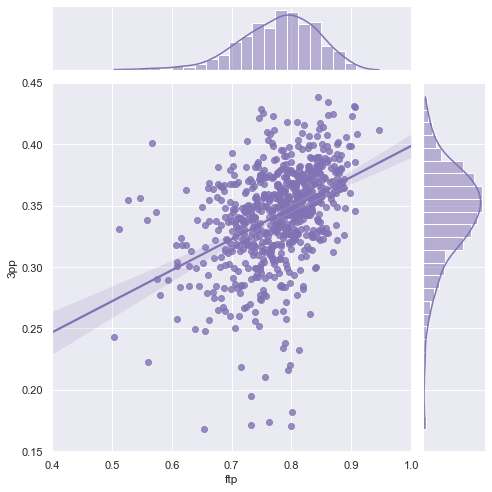

In [32]:
# in the above, we see the intuitive correlation between free throw percentage and 3 point percentage,
# both of which are known indicators of pure shooting prowess.
# Predictably, both marginals follow a normal distribution.
# Note the presence of outliers who have taken only a few shots and either made or missed them all.
# Let's fix that:

fixed = career.where(career['3PA'] >= 400)

# if the guy's taken 400 three-balls he should be good on foul shots

sns.set_theme(style="darkgrid")

sns.jointplot(x=fixed['ftp'], y=fixed['3pp'], 
                  kind="reg", truncate=False,
                  xlim=(.4, 1), ylim=(.15, .45),
                  color="m", height=7)

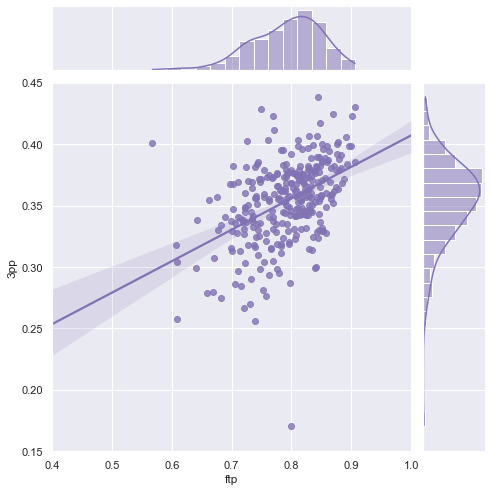

In [33]:
# note the longer tail of the free throw distribution:
# A poor free throw shooter may still have to take many free throws,
# while a poor 3pt shooter can simply shoot less.
# Tweaking the where() comdition reveals a lone exception to this rule: 

fixed = career.where(career['3PA'] >= 1500).dropna()

sns.jointplot(x=fixed['ftp'], y=fixed['3pp'], 
                  kind="reg", truncate=False,
                  xlim=(.4, 1), ylim=(.15, .45),
                  color="m", height=7)

In [34]:
# It turns out that there was an error somewhere along the line recording the data, 
# taken from basketballreference.com,
# and that this data point is off by a factor of 2 
# (Lopez is a 34.1% 3 point shooter according to nba.com/stats, 
# which checks with the rest of our data (3pm/3pa = .75/2.199 = .341))

# So I fix it

fixed.loc['Brook Lopez']['3pp'] = .341

In [35]:
# Let's see who's up there shooting 41% from 3 but around 57% from 3 point land

print(fixed.sort_values('ftp').iloc[0])

g       941.000000
gs      646.000000
mp      348.400000
mpt      26.477258
fgm       2.139001
fga       5.253560
fgp       0.403201
3pm       0.887460
3pa       2.272157
3pp       0.401460
2pm       1.246971
2pa       2.972689
2pp       0.409892
efg       0.485979
fgm       0.646652
fta       1.127099
ftp       0.567588
orb       0.514028
FTA    1060.600000
3PA    2138.100000
2PA    2797.300000
REB    2526.100000
drb       2.148565
rpg       2.684485
apg       1.185654
spg       0.791923
bpg       0.375770
tov       0.711158
pf        2.172795
ppg       5.826036
Name: Bruce Bowen, dtype: float64


It's NBA champion Bruce Bowen.
Bowen is the worst free throw shooter amongst veteran high-volume shooters.
Even more bizarre is that he is a top-tier marksman from long range, 
notching 40% lifetime from 3 (placing him in the 95%)
Weird, huh? I think film will explain this more than any data.

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Now let's investigate the relationship between scoring volume and scoring efficiency.

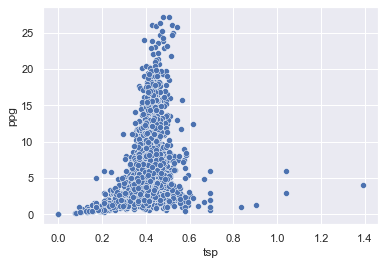

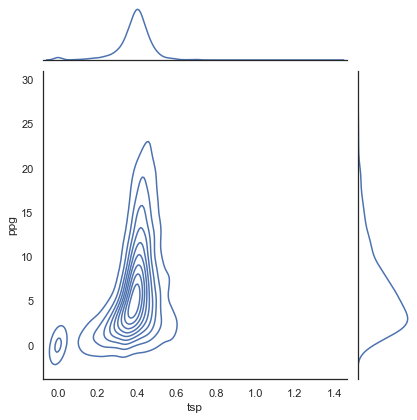

In [36]:
career['tsp'] = career['ppg'] / (2 * (career['fga'] + .44 * career['fga']))

sns.scatterplot(x=career.tsp, y=career.ppg)
plt.show()

with sns.axes_style('white'):
    sns.jointplot(x=career.tsp, y=career.ppg, kind='kde');


/Users/jovbrza/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/jovbrza/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/jovbrza/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


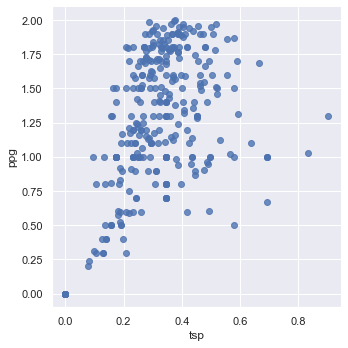

In [37]:

# These graphs seem to imply multiple layers of correlation depending on player skill
# Players with very low ppg see their ppg output rise steeply up to around 2 ppg.

# Players averaging 2 ppg are generally much closer the the median ts% of 40%:

fixed =  career.where(career.ppg < 2).dropna()

sns.lmplot(x='tsp', y='ppg', data=fixed)
plt.show()

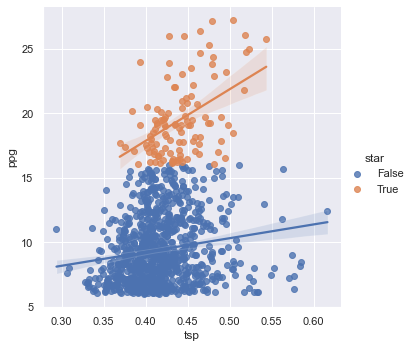

In [38]:
# I'm curious if the same ts%-ppg trend holds for players with higher ppg totals- that is, stars and superstars.
# These are more talented bench players and starters, whose output is used to determine their minutes, allowing better players to score more points.
# Let's draw the cutoff at 16ppg, representing the 95% of scorers.

fixed =  career.where(career.ppg > 6).where(career.tsp > .25)
fixed['star'] = fixed['ppg'] > 16
sns.lmplot(x='tsp', y='ppg', hue='star', data=fixed);
plt.show()

The correlation between true shooting and scoring volume is even more pronounced amongst the league's top scorers. 
It seems that the highest ppg totals are only achievable given elite scoring efficiency.

/Users/jovbrza/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/jovbrza/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/jovbrza/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


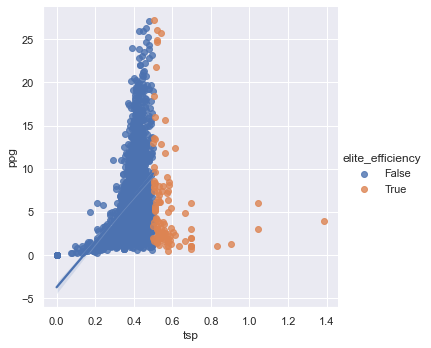

In [39]:
# Note that the greatest ts% scores are not accessible to the league's leading scorers.
# This level of efficiency is reserved for garbage men cleaning up rebounds, finishing ally-oops. making open dunks, etc.
# Their shots are limited in scope, so they cannot achieve high-volume scoring despite their elite efficiency:

fixed = career.copy()
fixed['elite_efficiency'] = fixed['tsp'] > .5
sns.lmplot(x='tsp', y='ppg', hue='elite_efficiency', data=fixed);

A clear demonstration of the pronounced negative correlation between volume and efficiency amongest the most efficient scorers.